# 1. Preliminary

## 1.1 Context

## 1.2 Imports

In [117]:
import os, sys, time

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from nltk.tokenize import word_tokenize, wordpunct_tokenize

import spacy

import pandas as pd
import numpy as np


from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px


from pandarallel import pandarallel

pandarallel.initialize()

!pip install sklearn

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [118]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /home/alex/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1.3 Loading data

In [119]:
# our file

data = "./data/cleaned/"
os.listdir(data)

['df.csv']

In [120]:
# load dataframe

fn = data + 'df.csv'

df = pd.read_csv(fn)

In [121]:
df.head()

,text,target,_len_txt
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


# 5. Working with text SEPARATE NOTEBOOK

##  5.1 10 random texts 

In [122]:
df.sample(10)

,text,target,_len_txt
5912,I slammed my phone to the ground and then scre...,0,59
199,ÛÏ@LeoBlakeCarter: This dog thinks he's an am...,0,102
3010,Let it be gone away like a dust in the wind .....,1,135
4766,@Lightning_OOC I AM BEING SUBJECTED TO UNWARRA...,0,71
3368,. @VELDFest announces refunds after Day two's ...,1,119
5924,I ran with earbuds in which I now realize mean...,0,130
5884,Watch This Airport Get Swallowed Up By A Sands...,1,91
6248,@PyrBliss ah I remember those days. In a snows...,1,55
7250,Death certificates safes weapons and Teslas: D...,0,88
4471,C-130 specially modified to land in a stadium ...,1,136


In [123]:
df_samp = df.sample(20)
df_samp

,text,target,_len_txt
589,RT alisonannyoung: EXCLUSIVE: FedEx no longer ...,0,135
5936,I SCREAMED AT THE END OAMSGAJAGAHAHAH IM LAIGH...,0,86
5169,@Gargron good sir I did not wish to but now I ...,0,81
4411,@Drsarwatzaib070 come on. IK will face MCourt ...,1,95
4366,Governor Allows Parole for School Bus Hijacker...,1,69
5138,US Navy Sidelines 3 Newest #Subs http://t.co/9...,0,55
2903,@CortneyMo_ put this in Detroit niggas gone be...,0,145
4563,Official kinesiology tape of IRONMANå¨ long-la...,0,141
5628,y'all read 12000 Nigerian refugees repatriated...,1,83
3900,@SeanPeconi @Jason_Floyd @LynchOnSports @crisc...,0,133


In [125]:
for idx, ser in df_samp.iterrows(): 

    txt_1 = f"target : {ser['target']}, len : {ser['_len_txt']}\n"
    print(txt_1+ser['text']+ "..." + "\n\n")

target : 0, len : 135
RT alisonannyoung: EXCLUSIVE: FedEx no longer to transport research specimens of bioterror pathogens in wake of anthrax lab mishaps Û_...


target : 0, len : 86
I SCREAMED AT THE END OAMSGAJAGAHAHAH IM LAIGHIGN #OTRAMETLIFE  http://t.co/eTkBW1RCrv...


target : 0, len : 81
@Gargron good sir I did not wish to but now I am forced to. I must obliterate you...


target : 1, len : 95
@Drsarwatzaib070 come on. IK will face MCourt for attacking parliment and hijacking TV station....


target : 1, len : 69
Governor Allows Parole for School Bus Hijacker http://t.co/u4bdy1W7d4...


target : 0, len : 55
US Navy Sidelines 3 Newest #Subs http://t.co/9WQixGMHfh...


target : 0, len : 145
@CortneyMo_ put this in Detroit niggas gone be acting out?? tryna fuck n drown mfs????????loose they buffs in the water?? https://t.co/OAQtjawGxg...


target : 0, len : 141
Official kinesiology tape of IRONMANå¨ long-lasting durability effectiveness on common injuries http://t.co/ejymkZPEEx ht

In [128]:
def print_sample(sub_df, n_samp=10) : 
    """ """
    
    if n_samp < len(sub_df): 
        df_samp = sub_df.sample(n_samp)
    else : 
        df_samp = sub_df.copy()
    
    for idx, ser in df_samp.iterrows(): 

        txt_1 = f"target : {ser['target']}, len : {ser['_len_txt']}\n"
        print(txt_1+ser['text']+ "..." + "\n\n")

In [130]:
df_1 = df[df.target==1]
df_1.head()

,text,target,_len_txt
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [131]:
print_sample(df_1)

target : 1, len : 21
Memphis always floods...


target : 1, len : 93
Three Israeli soldiers wounded in West Bank terrorist attack - Haaretz http://t.co/u4gSBNU8wc...


target : 1, len : 136
@SatanaOfHell ever seen by far. A dreamy look came over his face and his ears flattened as he started to walk slowly toward her.* You'd-...


target : 1, len : 136
Obama declares disaster for typhoon-devastated Saipan: President Barack Obama has declared the Commonwealth of... http://t.co/4k8OLZv9bV...


target : 1, len : 111
As California fires rage the Forest Service sounds the alarm about rising wildfire costs http://t.co/Tft1bb4xaZ...


target : 1, len : 122
[HIGH PRIORITY] SEVERE THUNDERSTORM WATCH ENDED Issued for Lethbridge [Updated: Aug 05th 20:29 MDT] http://t.co/yqYiwjN8eZ...


target : 1, len : 116
.@Vagersedolla visits villages recently bombed by Turkey and finds people fed up with the PKK http://t.co/UUWEiKD7sP...


target : 1, len : 83
Cue storm with massive wind and hail!! Now a power

In [132]:
print_sample(df[df.target==0])

target : 0, len : 40
Photo bombed ???? http://t.co/arTUMHmBhh...


target : 0, len : 114
@Haley_Whaley Hailstorm Hey There is a Secret Trick to get 375.000 Gems Clash ofClans check them now on my Profile...


target : 0, len : 82
The advantages apropos of in flames favorable regard mississauga ontario: pWHvGwax...


target : 0, len : 130
Even when I was a kid haha super late but folks used to bash me for that shit I understand he survived cancer but he still cheated...


target : 0, len : 64
@wisdc &amp; obama supports  death2USA .. http://t.co/serARcNrbY...


target : 0, len : 124
It partially has something to do with my trauma as well. But that's a long story and honestly I don't like to talk about it....


target : 0, len : 122
@okgabby_ damn suh. don't let that ruin your year bruh. this our year. better start carpooling like we did back in the day...


target : 0, len : 103
AMBULANCE SPRINTER AUTOMATIC FRONTLINE VEHICLE CHOICE OF 14 LEZ COMPLIANT | eBay http://t.co/q8IVrzOJZv...




# work on One

In [134]:
txt = df.text.sample(1)
txt = txt.values[0]
txt

"@DaughterofNai Tenshi activated Yuki's fire card!"

In [138]:
txt = txt.lower()
txt

"@daughterofnai tenshi activated yuki's fire card!"

In [139]:
txt = txt.strip().replace("  ", " ")
txt

"@daughterofnai tenshi activated yuki's fire card!"

In [140]:
raw_tokens_list  = word_tokenize(txt)
raw_tokens_list[:30]

['@',
 'daughterofnai',
 'tenshi',
 'activated',
 'yuki',
 "'s",
 'fire',
 'card',
 '!']

In [141]:
len(raw_tokens_list)

9

In [142]:
from nltk.corpus import stopwords

In [143]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'more', 'few', 'as', 'while', 'what', 'no', 'why', 'couldn', 'won', 'an', 'itself', 'her', 'were', 'our', 'wasn', 'be', 'against', 'during', 'under', 'themselves', 'yours', 'have', 'out', 'same', 'herself', 'been', 'did', 'their', 'both', "that'll", "hasn't", 'shouldn', 'your', 'into', "you've", 'has', 'it', 'or', 'this', 'than', 'himself', 'only', 'here', 'how', 'for', 'ma', 'yourselves', 'being', 'not', "it's", 'between', "she's", 'so', 'my', 'o', "didn't", 'other', 'below', 'they', 'having', 'by', 'then', 'will', 'am', 'she', "don't", 'you', 'but', 'before', 'don', 'above', 'of', 'if', 'can', "wouldn't", 'we', 'weren', 'are', 'ain', "weren't", "you'd", "mightn't", 't', 'doesn', 'ourselves', "isn't", "you'll", 'had', 'hers', 'where', "shan't", 'in', "shouldn't", 'shan', 'him', 'further', "needn't", "couldn't", 'haven', 'm', 'most', 'nor', 'aren', 'myself', 'just', 'its', 'from', 'each', 'now', 'theirs', 'do', 'them', 'that', 'some', 'over', 'ours', "you're", 'the', 'didn', 'hadn', '

In [145]:
cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

In [146]:
cleaned_tokens_list[:50]

['@',
 'daughterofnai',
 'tenshi',
 'activated',
 'yuki',
 "'s",
 'fire',
 'card',
 '!']

In [147]:
len(cleaned_tokens_list)

9

In [148]:
from nltk.tokenize import RegexpTokenizer

In [157]:
tokenizer = RegexpTokenizer(r"\w+")
raw_tokens_list = tokenizer.tokenize(txt)


raw_tokens_list[:50]

['daughterofnai', 'tenshi', 'activated', 'yuki', 's', 'fire', 'card']

In [158]:
raw_tokens_list

['daughterofnai', 'tenshi', 'activated', 'yuki', 's', 'fire', 'card']

In [159]:
cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

In [160]:
cleaned_tokens_list[:50]

['daughterofnai', 'tenshi', 'activated', 'yuki', 'fire', 'card']

In [161]:
len(cleaned_tokens_list)

6

In [162]:
def process_text(txt, rejoin=False) : 
    
    txt = txt.lower().strip()
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [164]:
corpus = list(df.text.values)
corpus[:3]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"]

In [165]:
corpus = "".join(corpus)
corpus[:5000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us allForest fire near La Ronge Sask. CanadaAll residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected13,000 people receive #wildfires evacuation orders in California Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areasI'm on top of the hill and I can see a fire in the woods...There's an emergency evacuation happening now in the building across the streetI'm afraid that the tornado is coming to our area...Three people died from the heat wave so farHaha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding#raining #flooding #Florida #TampaBay #

In [166]:
cleaned_corpus = process_text(corpus)
cleaned_corpus

['deeds',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'allforest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canadaall',
 'residents',
 'asked',
 'shelter',
 'place',
 'notified',
 'officers',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected13',
 '000',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders',
 'california',
 'got',
 'sent',
 'photo',
 'ruby',
 'alaska',
 'smoke',
 'wildfires',
 'pours',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 '20',
 'closed',
 'directions',
 'due',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'streets',
 'manitou',
 'colorado',
 'springs',
 'areasi',
 'top',
 'hill',
 'see',
 'fire',
 'woods',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'across',
 'streeti',
 'afraid',
 'tornado',
 'coming',
 'area',
 'three',
 'people',
 'died',
 'heat',
 'wave',
 'farhaha',
 'south',
 'tampa',
 'getting',
 'flo

In [167]:
len(cleaned_corpus)

83858

In [170]:
tmp = pd.Series(cleaned_corpus).value_counts()
tmp

co             4740
http           4263
https           408
amp             344
like            343
               ... 
appalling         1
businessmen       1
jlwhaowfqa        1
saveti            1
ymy4rskq3d        1
Length: 22486, dtype: int64

In [171]:
tmp.head(30)

co           4740
http         4263
https         408
amp           344
like          343
û_            297
fire          234
get           226
via           219
2             204
people        194
new           183
one           181
news          167
disaster      148
emergency     146
video         138
would         135
body          127
police        123
still         121
3             120
burning       119
crash         117
u             117
us            115
storm         114
back          113
know          113
day           112
dtype: int64

In [172]:
tmp.tail(30)

sweated                1
drying                 1
gqpi7jmkan             1
sharethissouth         1
92                     1
88                     1
17000                  1
drrichardbesser        1
columbus               1
n8ezfctfcemichael      1
rowysolouisville       1
hxvfmouhdm             1
steveycheese99         1
mapmyrun               1
stung                  1
x6asgrjswcgot          1
transgender            1
mwlippert              1
southkorea             1
electrocutedboiling    1
waterfur               1
3a50dhz7yijust         1
50ft                   1
hairdryer              1
earths_voice           1
appalling              1
businessmen            1
jlwhaowfqa             1
saveti                 1
ymy4rskq3d             1
dtype: int64

In [173]:
len(df)

7613

In [174]:
tmp.describe()

count    22486.000000
mean         3.729343
std         43.687675
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       4740.000000
dtype: float64

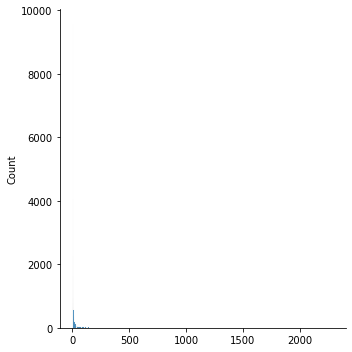

In [177]:
tmp.head(30)

co           4740
http         4263
https         408
amp           344
like          343
û_            297
fire          234
get           226
via           219
2             204
people        194
new           183
one           181
news          167
disaster      148
emergency     146
video         138
would         135
body          127
police        123
still         121
3             120
burning       119
crash         117
u             117
us            115
storm         114
back          113
know          113
day           112
dtype: int64

In [48]:
tmp.tail(30)

monaghan        1
sidhe           1
ectoplasm       1
countess        1
ilona           1
kakosy          1
raskine         1
infamy          1
firefighting    1
mania           1
shayera         1
206             1
aldus           1
hath            1
trotting        1
jumble          1
zauriel         1
roch            1
stonechat       1
katar           1
amicable        1
hol             1
byth            1
pyromaniac      1
pseudonym       1
2166            1
potentials      1
maroon          1
aberrations     1
misjudged       1
dtype: int64

In [175]:
sns.countplot(pd.Series(cleaned_corpus))

/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

Error in callback <function flush_figures at 0x7f9b4f8db790> (for post_execute):


KeyboardInterrupt: 

In [178]:
tmp

co             4740
http           4263
https           408
amp             344
like            343
               ... 
appalling         1
businessmen       1
jlwhaowfqa        1
saveti            1
ymy4rskq3d        1
Length: 22486, dtype: int64

In [179]:
list_unique_words = tmp[tmp==1]
list_unique_words[:30]

x9cuihib5nfinnish    1
creatures            1
nukes                1
ys3nmwwyvc           1
pact                 1
stunckle             1
alpotnb7q3japan      1
restart              1
navygermany          1
40mln                1
construct            1
willie_am_i          1
0dxvz7fdh3a          1
cataclysmic          1
gpvzv0249yus         1
e9d9lk5fdwnuclear    1
promised             1
sy2whxt0k5           1
frkodestuknavy       1
rt_america           1
xkurdr3yevnuclear    1
melts                1
subsd                1
indo                 1
xn09mx6sxy           1
businessus           1
d8awx2okke           1
justthebottle        1
sizewell             1
reator               1
dtype: int64

In [180]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['x9cuihib5nfinnish',
 'creatures',
 'nukes',
 'ys3nmwwyvc',
 'pact',
 'stunckle',
 'alpotnb7q3japan',
 'restart',
 'navygermany',
 '40mln',
 'construct',
 'willie_am_i',
 '0dxvz7fdh3a',
 'cataclysmic',
 'gpvzv0249yus',
 'e9d9lk5fdwnuclear',
 'promised',
 'sy2whxt0k5',
 'frkodestuknavy',
 'rt_america',
 'xkurdr3yevnuclear',
 'melts',
 'subsd',
 'indo',
 'xn09mx6sxy',
 'businessus',
 'd8awx2okke',
 'justthebottle',
 'sizewell',
 'reator']

In [181]:
def process_text(txt, rejoin=False) : 
    
    txt = txt.lower().strip()
    
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    non_unique_tokens_list = [w for w in cleaned_tokens_list not in list_unique_words]
    
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) > 3 ]
    
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [182]:
"a12".isalpha()

False

In [183]:
cleaned_corpus[:100]

['deeds',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'allforest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canadaall',
 'residents',
 'asked',
 'shelter',
 'place',
 'notified',
 'officers',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected13',
 '000',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders',
 'california',
 'got',
 'sent',
 'photo',
 'ruby',
 'alaska',
 'smoke',
 'wildfires',
 'pours',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 '20',
 'closed',
 'directions',
 'due',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'streets',
 'manitou',
 'colorado',
 'springs',
 'areasi',
 'top',
 'hill',
 'see',
 'fire',
 'woods',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'across',
 'streeti',
 'afraid',
 'tornado',
 'coming',
 'area',
 'three',
 'people',
 'died',
 'heat',
 'wave',
 'farhaha',
 'south',
 'tampa',
 'getting',
 'flo

In [184]:
len(set(cleaned_corpus))

22486

'car'

In [185]:

 
ps = PorterStemmer()

In [186]:
lemm_cleanned_corpus = [lemmatizer.lemmatize(i) for i in cleaned_corpus ]

In [187]:
len(set(lemm_cleanned_corpus))

21288

In [188]:
def process_text(txt, rejoin=True, lemm_or_stemm = "stem") : 
    """global text processing function"""
    
    # lower and strip
    txt = txt.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop unique tokens
    non_unique_tokens_list = [w for w in cleaned_tokens_list if w not in list_unique_words]
    
    # keep only len word > 3
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) > 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
    
    #  return a list or a string
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [189]:
df["clean_text"] = df.text.apply(lambda i : process_text(i))

In [190]:
df.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [192]:
df.clean_text

0                      deed reason earthquak allah forgiv
1                                 forest fire near canada
2       resid ask shelter place offic evacu shelter pl...
3             peopl receiv wildfir evacu order california
4                  sent photo alaska smoke wildfir school
                              ...                        
7608      giant crane hold bridg collaps nearbi home http
7609    thetawniest control wild fire california even ...
7610                                  volcano hawaii http
7611    polic investig bike collid littl portug bike r...
7612    latest home raze northern california wildfir n...
Name: clean_text, Length: 7613, dtype: object

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [200]:
tf = TfidfVectorizer()
res = tf.fit_transform(df.clean_text)
res

<7613x5176 sparse matrix of type '<class 'numpy.float64'>'
	with 53222 stored elements in Compressed Sparse Row format>

In [201]:
res = res.toarray()
res

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [202]:
tf.get_feature_names_out()

array(['aannnnd', 'aashiqui', 'abandon', ..., 'ûïwe', 'ûïwhen', 'ûïyou'],
      dtype=object)

In [204]:
res = pd.DataFrame(res, columns=tf.get_feature_names_out())
res

,aannnnd,aashiqui,abandon,abbott,abbruchsimul,abbswinston,abcnew,abia,abil,abl,ablaz,abomin,abort,absolut,abstorm,absurdli,abus,academia,accept,access,accid,accident,accidentalpropheci,accionempresa,accord,accordingli,account,accus,accustom,acdelco,acenewsdesk,achiev,achimota,acid,acoust,acr,across,act,action,activ,...,yyeso,yzhvobgocq,zabadani,zarri,zaynmalik,zdpvqmeez,zeal,zero,zfivvxydzi,zfyqsawvrk,zgjgghdurf,zgsjwxdrcm,zhjlflbhzl,zhzvprzbgq,zicac,zimpapersview,zionism,zionist,zippednew,zisuwlqrhf,zlvebeoavg,zmwecbwvao,zodiac,zombi,zone,zqqjrqsbjm,zvobmdxhgp,zyssobxntc,zzweeezjug,åèmgn,ûªll,ûªre,ûªve,ûïhatchet,ûïrichmond,ûïstretcher,ûïthe,ûïwe,ûïwhen,ûïyou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
len(tf.get_feature_names_out())

5176

In [206]:
res

,aannnnd,aashiqui,abandon,abbott,abbruchsimul,abbswinston,abcnew,abia,abil,abl,ablaz,abomin,abort,absolut,abstorm,absurdli,abus,academia,accept,access,accid,accident,accidentalpropheci,accionempresa,accord,accordingli,account,accus,accustom,acdelco,acenewsdesk,achiev,achimota,acid,acoust,acr,across,act,action,activ,...,yyeso,yzhvobgocq,zabadani,zarri,zaynmalik,zdpvqmeez,zeal,zero,zfivvxydzi,zfyqsawvrk,zgjgghdurf,zgsjwxdrcm,zhjlflbhzl,zhzvprzbgq,zicac,zimpapersview,zionism,zionist,zippednew,zisuwlqrhf,zlvebeoavg,zmwecbwvao,zodiac,zombi,zone,zqqjrqsbjm,zvobmdxhgp,zyssobxntc,zzweeezjug,åèmgn,ûªll,ûªre,ûªve,ûïhatchet,ûïrichmond,ûïstretcher,ûïthe,ûïwe,ûïwhen,ûïyou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pca = PCA()
X_pca = pca.fit_transform(res)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
len(cumsum)

In [ ]:
plt.plot(range(1, len(cumsum)+1), cumsum)

In [101]:
X_pca = X_pca[:, :800]

In [105]:
X_pca.shape

(1249, 800)

In [106]:
X_train = pd.DataFrame(X_pca)
y_train = df._score

In [107]:
estimator = RandomForestClassifier()

param_grid = {
}

cv = 10

In [108]:
grid = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)



/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={})

In [109]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res = res[cols]


In [110]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score
0,8.490941,1.058629,0.024754,0.004654,{},0.128877,0.018951,1


In [114]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import TruncatedSVD 

In [115]:
tsd = TruncatedSVD()

In [116]:
X_pca = tsd.fit_transform(res)

TypeError: float() argument must be a string or a number, not 'dict'